## Add imports

In [1]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

### Load dataset

In [2]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (6966,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch city,water,field,forest
Processing city
Size of city is 49600
Processing water
Size of water is 155000
Processing field
Size of field is 982700
Processing forest
Size of forest is 456100
Train size: 1314720. Test size: 328680


### Transform to binary tree

In [3]:
dataset.categories_map

{'city': 1, 'water': 2, 'field': 3, 'forest': 4}

In [4]:
from dataset_tool.dataset_tree_transformer import *
importlib.reload(dataset_tool.dataset_tree_transformer)


<module 'dataset_tool.dataset_tree_transformer' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_tree_transformer.py'>

In [5]:
dataset_tree = DatasetTreeAdapter(dataset)

COnfig path /tmp/pycharm_project_568/Classification/dataset_config
categories tree string ["city",["water",["field","forest"]]]
List array ['city', ['water', ['field', 'forest']]].
Creating dataset: train len: 1314720 test len: 328680
Creating dataset: train len: 1275062 test len: 318738
Creating dataset: train len: 1151165 test len: 287635


In [6]:
dataset_tree.dataset_tree

In [7]:
#importlib.reload(dataset_tool.KNNClassifier)
from dataset_tool.KNNClassifier import *





### Use KNN-C

#### Model fit

In [8]:
knn_classifier = KNNClassifier(dataset_tree.dataset_tree)

In [9]:
knn_classifier.fit()

Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]


In [10]:
knn_classifier.predict_test()

Start prediction test data:
Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]
Working with: idx 0 and shape (328680, 12)...
Working with: idx 1 and shape (318738, 12)...
Working with: idx 2 and shape (287635, 12)...


#### Get classification report

In [11]:
import cuml
type(knn_classifier.models[0]) == cuml.internals.base_helpers.BaseMetaClass

False

In [12]:
from dataset_tool.classification_report_creator import *

In [13]:
knn_report_creator = ClassificationReportCreator(knn_classifier.predictions,dataset_tree.dataset_tree)

In [14]:
knn_report_creator.display_tree_predictions()

Get accureacy for 0 iteration
Accureacy 0.9903127551078796
              precision    recall  f1-score   support

           1       0.69      0.98      0.81      7008
           2       1.00      0.99      1.00    321672

    accuracy                           0.99    328680
   macro avg       0.85      0.99      0.90    328680
weighted avg       0.99      0.99      0.99    328680

Get accureacy for 1 iteration
Accureacy 0.9979920983314514
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     30877
           2       1.00      1.00      1.00    287861

    accuracy                           1.00    318738
   macro avg       0.99      1.00      0.99    318738
weighted avg       1.00      1.00      1.00    318738

Get accureacy for 2 iteration
Accureacy 0.9515497088432312
              precision    recall  f1-score   support

           1       0.97      0.96      0.96    199135
           2       0.91      0.94      0.92     88500

    a

In [15]:
import numpy as np
arrr = np.asarray([1,2,3,4,5,6])

In [16]:
np.delete(arrr,[0,3,5])

array([2, 3, 5])

### Gaussian naive Bayes

#### GNB fit

In [17]:
from dataset_tool.NBClassifier import *

In [18]:
gnb_classifier = GaussianNBClassiefier(dataset_tree.dataset_tree)

In [19]:
gnb_classifier.fit()

Models [GaussianNB(), GaussianNB(), GaussianNB()]


In [20]:
gnb_classifier.predict_test()

Start prediction test data:
Models [GaussianNB(), GaussianNB(), GaussianNB()]
Working with: idx 0 and shape (328680, 12)...
Working with: idx 1 and shape (318738, 12)...
Working with: idx 2 and shape (287635, 12)...


### SVM fit

In [21]:
from dataset_tool.SVMClassifier import *

In [22]:
svm_classifier = SVMClassiefier(dataset_tree.dataset_tree)

In [23]:
#svm_classifier.fit()

In [24]:
#from dataset_tool.KNNCTF import *

In [25]:
#tf_knnc =

## Predict on test image

In [26]:
from dataset_tool.real_prediction import *
#importlib.reload(dataset_tool.real_prediction)

In [27]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [28]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", knn_classifier.models)

In [29]:
real_prediction_gnb = RealPrediction("/tmp/shared/dataset4/2", gnb_classifier.models)

In [30]:
#real_prediction_svc = RealPrediction("/tmp/shared/dataset4/2", svm_classifier.models)

In [31]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [32]:
real_prediction_knn.predict()

In [33]:
real_prediction_gnb.predict()

In [34]:
# real_prediction_svc.predict()

In [35]:
arr2 = np.zeros(real_prediction_knn.x_scaled_base.shape[0])
idxs = []
array = np.empty(0)
for index, item in reversed(list(enumerate(real_prediction_knn.predictions))):
    new_array = np.zeros(array.shape[0] + item[1].shape[0], dtype=float)
    print(f"Predcition: {item[2]}. Len of idxs: {len(item[0])}. New array shape: {new_array.shape}")
    print(f"items before: {item[1]}: Min value: {item[1].min()} max value: {item[1].max()}. Items with 1: {np.where(item[1][item[1]==1])[0].shape}.Items with 2: {np.where(item[1][item[1]==2])[0].shape}")
    new_items = item[1].copy() + item[2]
    print(f"items after: {new_items}: Min value: {new_items.min()} max value: {new_items.max()}. Items with {1+item[2]}: {np.where(new_items[new_items==1+item[2]])[0].shape}.Items with {2+item[2]}: {np.where(new_items[new_items==2+item[2]])[0].shape}")
    #print(f"items before: {new_items}")
    if len(item[0]) == 0:
        new_array[np.arange(item[1].shape[0])] = new_items.copy()
    else:
        print(f"items idx: {item[0]}  with type {type(item[0])}")
        new_array[~np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = array.copy()
        new_array[np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = new_items.copy()
    array = new_array
    print(f"max: {array.min()}")


Predcition: 2. Len of idxs: 0. New array shape: (637748,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 2. Items with 1: (606013,).Items with 2: (31735,)
items after: [3 3 3 ... 3 3 3]: Min value: 3 max value: 4. Items with 3: (606013,).Items with 4: (31735,)
max: 3.0
Predcition: 1. Len of idxs: 58551. New array shape: (696299,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (58551,).Items with 2: (0,)
items after: [2 2 2 ... 2 2 2]: Min value: 2 max value: 2. Items with 2: (58551,).Items with 3: (0,)
items idx: [     0      1      2 ... 696038 696039 696040]  with type <class 'numpy.ndarray'>
max: 2.0
Predcition: 0. Len of idxs: 1673. New array shape: (697972,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (1673,).Items with 2: (0,)
items after: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (1673,).Items with 2: (0,)
items idx: [ 18965  18966  18967 ... 694246 695339 695340]  with type <class 'numpy.ndarra

In [36]:
print(f"Shape of 1: {array[array == 1].shape}.\nShape of 2: {array[array == 2].shape}.\nShape of 3: {array[array == 3].shape}.\nShape of 4: {array[array == 4].shape}")

Shape of 1: (1673,).
Shape of 2: (58551,).
Shape of 3: (606013,).
Shape of 4: (31735,)


In [37]:
immmm2 = array.reshape((real_prediction_knn.height, real_prediction_knn.width))

In [38]:
real_prediction_knn

In [39]:
real_prediction_knn.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (637748,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 2. Items with 1: (606013,).Items with 2: (31735,)
items after: [3 3 3 ... 3 3 3]: Min value: 3 max value: 4. Items with 3: (606013,).Items with 4: (31735,)
max: 3.0
Predcition: 1. Len of idxs: 58551. New array shape: (696299,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (58551,).Items with 2: (0,)
items after: [2 2 2 ... 2 2 2]: Min value: 2 max value: 2. Items with 2: (58551,).Items with 3: (0,)
items idx: [     0      1      2 ... 696038 696039 696040]  with type <class 'numpy.ndarray'>
max: 2.0
Predcition: 0. Len of idxs: 1673. New array shape: (697972,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (1673,).Items with 2: (0,)
items after: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (1673,).Items with 2: (0,)
items idx: [ 18965  18966  18967 ... 694246 695339 695340]  with type <class 'numpy.ndarra

In [40]:
real_prediction_gnb.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (543129,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 2. Items with 1: (519603,).Items with 2: (23526,)
items after: [3 3 3 ... 3 3 3]: Min value: 3 max value: 4. Items with 3: (519603,).Items with 4: (23526,)
max: 3.0
Predcition: 1. Len of idxs: 58476. New array shape: (601605,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (58476,).Items with 2: (0,)
items after: [2 2 2 ... 2 2 2]: Min value: 2 max value: 2. Items with 2: (58476,).Items with 3: (0,)
items idx: [     0      1      2 ... 601350 601351 601352]  with type <class 'numpy.ndarray'>
max: 2.0
Predcition: 0. Len of idxs: 96367. New array shape: (697972,)
items before: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (96367,).Items with 2: (0,)
items after: [1 1 1 ... 1 1 1]: Min value: 1 max value: 1. Items with 1: (96367,).Items with 2: (0,)
items idx: [   167    200    206 ... 697814 697815 697816]  with type <class 'numpy.nda

In [41]:
# real_prediction_svc.flatten()

In [42]:
im = real_prediction_knn.to2d()

In [43]:
max(real_prediction_knn.predictions[0][1])

1

In [44]:
len(im[im==1])

1673

In [45]:
im_gnb = real_prediction_gnb.to2d()

In [46]:
im.max()

4.0

In [47]:
#im_svc = real_prediction_svc.to2d()

In [48]:
real_prediction_knn.height

638

In [49]:
predictions = real_prediction_knn.predictions

In [50]:
len(predictions[2][0])

0

In [51]:
real_prediction_knn.predictions[0][1].shape

(1673,)

[Text(1, 1, 'city'),
 Text(1, 2, 'water'),
 Text(1, 3, 'field'),
 Text(1, 4, 'forest')]

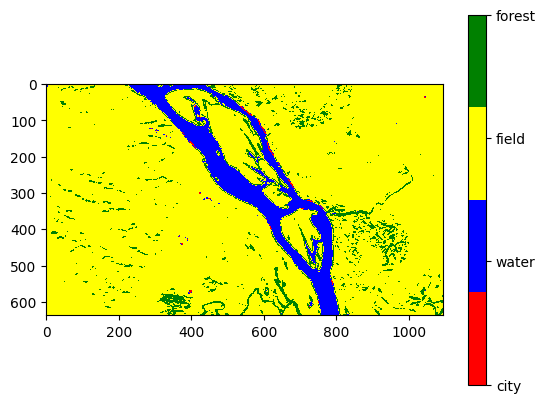

In [52]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im, cmap=ListedColormap(['red','blue','yellow','green']))
labels = list(['city','water','field','forest'])
values = list([1,2,3,4])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

[Text(1, 1, 'city'),
 Text(1, 2, 'water'),
 Text(1, 3, 'field'),
 Text(1, 4, 'forest')]

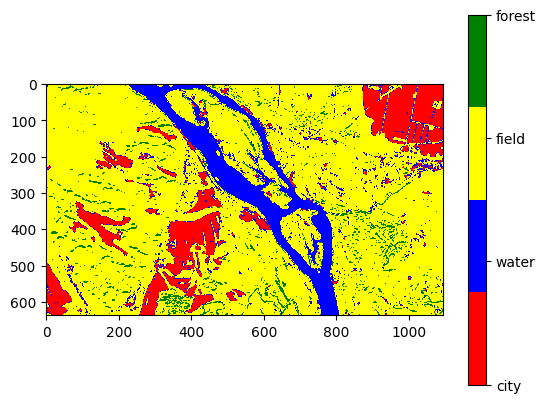

In [53]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
# plt.imshow(im)
# im1 = ax[1].imshow(knn_image_default_1,cmap=ListedColormap(['blue', 'purple']))
# im3 = ax[2].imshow(mnb_image_default_1,cmap=ListedColormap(['blue', 'purple']))
#im4 = ax[3].imshow(svm_image_default_1,cmap=ListedColormap(['blue', 'purple']))
plt.imshow(im_gnb, cmap=ListedColormap(['red','blue','yellow','green']))
labels = list(['city','water','field','forest'])
values = list([1,2,3,4])
plt.title = "KKNC"
# ax[1].set_title("KNNC")
# ax[2].set_title("Naive bayes")
#ax[2].set_title("SVM")
# Create a colorbar with the legend
colorbar = plt.colorbar(ticks=values)
colorbar.ax.set_yticklabels(labels)

In [54]:
plt.imshow(im_svc)

NameError: name 'im_svc' is not defined

In [ ]:
real_prediction_knn.predict_proba()

In [ ]:
#real_prediction_knn.flatten_proba()

In [ ]:
real_prediction_knn.predictions[0][1][0]

In [ ]:
real_prediction_knn.predictions_proba[0][1]

In [ ]:
# def flatten_proba(self):
#     array = np.empty(0)
#     for index, item in reversed(list(enumerate(self.predictions_proba))):
#         new_array = np.empty((array.shape[0] + item[1].shape[0],2), dtype=float)
#         print(f"Predcition: {item[2]}. Len of idxs: {len(item[0])}. New array shape: {new_array.shape}")
#         new_items = item[1] + item[2]
#         if len(item[0]) == 0:
#             new_array[np.arange(item[1].shape[0])] = new_items
#         else:
#             new_array[item[0]] = item[1]
#             new_array[~np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = array
#         array = new_array
#     self.predictions_composite_proba = array

In [ ]:
import numpy as np

item1 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])
item2 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])

In [ ]:
# item1_1 = item1[0]
# item2_1 = item2[0]

In [ ]:
# item3 = item1[0][2] * item2_1

In [ ]:
result = item1 * item2[:, 0][:, np.newaxis]

In [ ]:
result

In [ ]:
result = np.hstack((item1, result, result * item2[:, 1][:, np.newaxis]))

In [ ]:
result

In [ ]:
result2 = np.hstack((item1, (item1 * item2).sum(axis=1, keepdims=True)))

In [ ]:
result2

In [ ]:
item1[0][1]*item2[0]

In [ ]:
item1[0][1]

In [ ]:
item2[0]

In [ ]:
i1 = item1[:,1][:,np.newaxis] * item2

In [ ]:
i2 = item1[:,0]

In [ ]:
np.zstack(i2,i1)

In [ ]:
i1.shape

In [ ]:
i2.shape

In [ ]:
np.hstack((i2[:, np.newaxis], i1))

In [ ]:
probas = np.asarray(real_prediction_knn.predictions_proba)

In [ ]:
probas.shape

In [ ]:
# def flatten_probas():
#     new_array = np.empty(0)
#
#     for idx, item in enumerate(probas):
#         print(f"idx: {idx}")
#         if idx == 0:
#             new_array = item
#         else:
#             i1 = new_array[:, idx][:,np.newaxis] * item
#             i2 = new_array[:,:idx]
#             new_array = np.hstack((i2, i1))
#
#     return new_array

In [ ]:
# arrrrr = flatten_probas()

In [ ]:
# arrrrr.shape

In [ ]:
# from dataset_tool.graph_utils import *
#
# createHistGraph(arrrrr, dataset.categories_map)

In [ ]:
i2 = arrrrr[:, :1]

In [ ]:
i1.shape

In [ ]:
np.hstack((i2,i1))

In [ ]:
probas[1]